In [1]:
using Nemo # For whatever reason required but not a dependency for Symbolics.symbolic_solve
import Symbolics

import DifferentialEquations

In [2]:
x = Symbolics.variable("x")
y = Symbolics.variable("y")
z = Symbolics.variable("z")

z

In [3]:
a, b, c = Symbolics.@variables a b c

3-element Vector{Symbolics.Num}:
 a
 b
 c

In [4]:
Symbolics.symbolic_solve(x^2 + y^2 -1, x)

2-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 (1//2)*√(4 - 4(y^2))
 (-1//2)*√(4 - 4(y^2))

In [5]:
Symbolics.@variables t x(t) f(t) m c

5-element Vector{Symbolics.Num}:
    t
 x(t)
 f(t)
    m
    c

In [6]:
v = Symbolics.derivative(x, t)

Differential(t)(x(t))

In [7]:
a = Symbolics.derivative(v, t)

Differential(t)(Differential(t)(x(t)))

In [8]:
eq = m*a + c*v - f

-f(t) + c*Differential(t)(x(t)) + m*Differential(t)(Differential(t)(x(t)))

In [9]:
Symbolics.symbolic_solve(eq, x)

AssertionError: AssertionError: Differential equations are not currently supported

In [10]:
using ModelingToolkit

In [19]:
@independent_variables t
@variables x(t)
@parameters f(t) m c
ModelingToolkit.@parameters m c
v = ModelingToolkit.derivative(x, t)
a = ModelingToolkit.derivative(v, t)
ModelingToolkit.@mtkbuild sys = ModelingToolkit.ODESystem([m*a + c*v ~ 10*sin(t)], t)

Model sys:
Equations (2):
  2 standard: see equations(sys)
Unknowns (2): see unknowns(sys)
  x(t)
  xˍt(t)
Parameters (2): see parameters(sys)
  m
  c

In [23]:
prob = DifferentialEquations.ODEProblem(sys, [0,5], (0.0, 100.0), [m => 1.0, c => 1.0])

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: 2-element Vector{Float64}:
 0.0
 5.0

In [24]:
sol = DifferentialEquations.solve(prob)

retcode: Success
Interpolation: 3rd order Hermite
t: 112-element Vector{Float64}:
   0.0
   0.00019996000400079948
   0.002199560044008794
   0.022195560444088738
   0.10285829753321156
   0.25358342354060287
   0.4586572209475783
   0.7228872150593224
   1.053127758825737
   1.4594675271648794
   ⋮
  92.39793881293117
  93.35797702061372
  94.57866663057341
  95.46648595216364
  96.3853707858523
  97.56409587216908
  98.4774954943239
  99.40833965783092
 100.0
u: 112-element Vector{Vector{Float64}}:
 [0.0, 5.0]
 [0.0009997000799830016, 4.999000499840032]
 [0.01098573164848161, 4.9890384586637015]
 [0.1097733797131572, 4.892689733681876]
 [0.4904929859227587, 4.562359538711561]
 [1.1453797615970147, 4.174423742406742]
 [1.9817194181444044, 4.051802442792979]
 [3.089253582444849, 4.411758281047178]
 [4.6923954266041354, 5.359049267845881]
 [7.151855772681221, 6.7371544294874415]
 ⋮
 [21.186389734087236, -3.431870793336739]
 [15.737986970050258, -7.0334868517275115]
 [8.643707360809797, 

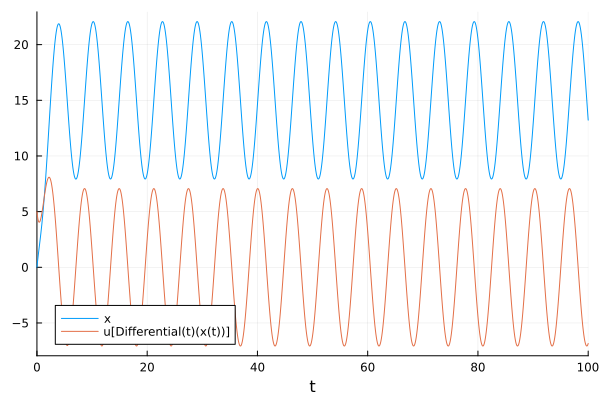

In [25]:
using Plots
plot(sol, idxs=[x,v])